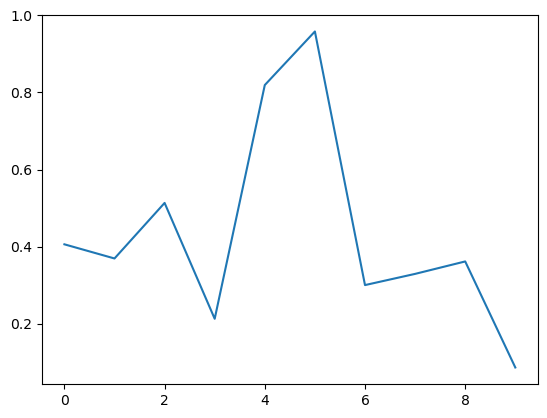

TypeError: Figure.draw() missing 1 required positional argument: 'renderer'

In [1]:
from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib auto
fig = plt.figure()#创建figure对象实例
ax = fig.add_subplot(111)#1行1列1个图
ax.plot(np.random.rand(10))#产生随机数
# 定义回调函数event是事件参数
def onclick(event):
    print('button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          (event.button, event.x, event.y, event.xdata, event.ydata))
# 连接事件
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show() #该FigureCanvas方法 mpl_connect()返回一个连接ID，它只是#一个整数。当想断开回调时，只需调用：
# 取消关联
fig.canvas.mpl_disconnect(cid)
fig.draw()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


axsrc.set(xlim=(0, 1), ylim=(0, 1), autoscale_on=False,
          title='Click to zoom')
axzoom.set(xlim=(0.45, 0.55), ylim=(0.4, 0.6), autoscale_on=False,
           title='Zoom window')
x, y, s, c = np.random.rand(4, 200)
s *= 200
figsrc, axsrc = plt.subplots()
figzoom, axzoom = plt.subplots()
axsrc.scatter(x, y, s, c)
axzoom.scatter(x, y, s, c)
def onpress(event):
    if event.button != 1:
        return
    x, y = event.xdata, event.ydata
    axzoom.set_xlim(x - 0.1, x + 0.1)
    axzoom.set_ylim(y - 0.1, y + 0.1)
    figzoom.canvas.draw()
figsrc.canvas.mpl_connect('button_press_event', onpress)
plt.show()

IndentationError: unexpected indent (2793374756.py, line 40)

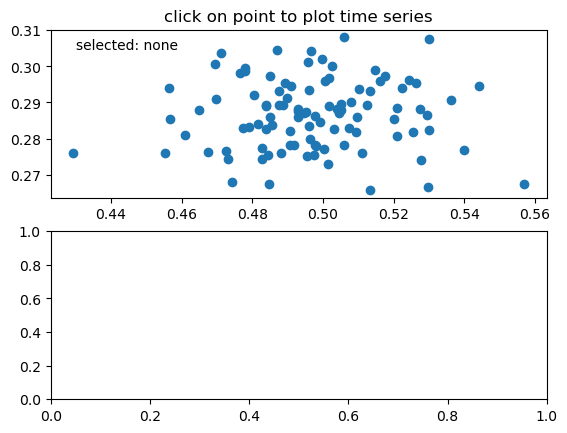

In [4]:
import numpy as np

class PointBrowser:
  

    def __init__(self):
        self.lastind = 0

        self.text = ax.text(0.05, 0.95, 'selected: none',
                            transform=ax.transAxes, va='top')
        self.selected, = ax.plot([xs[0]], [ys[0]], 'o', ms=12, alpha=0.4,
                                 color='yellow', visible=False)

    def on_press(self, event):
        if self.lastind is None:
            return
        if event.key not in ('n', 'p'):
            return
        if event.key == 'n':
            inc = 1
        else:
            inc = -1

        self.lastind += inc
        self.lastind = np.clip(self.lastind, 0, len(xs) - 1)
        self.update()

    def on_pick(self, event):

        if event.artist != line:
            return True

        N = len(event.ind)
        if not N:
            return True

        # the click locations
        x = event.mouseevent.xdata
        y = event.mouseevent.ydata

        distances = np.hypot(x - xs[event.ind], y - ys[event.ind])
        indmin = distances.argmin()
        dataind = event.ind[indmin]

        self.lastind = dataind
        self.update()

    def update(self):
        if self.lastind is None:
            return

        dataind = self.lastind

        ax2.cla()
        ax2.plot(X[dataind])

        ax2.text(0.05, 0.9, f'mu={xs[dataind]:1.3f}\nsigma={ys[dataind]:1.3f}',
                 transform=ax2.transAxes, va='top')
        ax2.set_ylim(-0.5, 1.5)
        self.selected.set_visible(True)
        self.selected.set_data(xs[dataind], ys[dataind])

        self.text.set_text('selected: %d' % dataind)
        fig.canvas.draw()


if __name__ == '__main__':
    import matplotlib.pyplot as plt
    # Fixing random state for reproducibility
    np.random.seed(19680801)

    X = np.random.rand(100, 200)
    xs = np.mean(X, axis=1)
    ys = np.std(X, axis=1)

    fig, (ax, ax2) = plt.subplots(2, 1)
    ax.set_title('click on point to plot time series')
    line, = ax.plot(xs, ys, 'o', picker=True, pickradius=5)

    browser = PointBrowser()

    fig.canvas.mpl_connect('pick_event', browser.on_pick)
    fig.canvas.mpl_connect('key_press_event', browser.on_press)

    plt.show()


In [11]:
import pyecharts
pyecharts.globals._WarningControl.ShowWarning = False
import warnings
warnings.filterwarnings('ignore')
from pyecharts.globals import ThemeType
from pyecharts import options as opts
import os as os
import pandas as pd
import numpy as np
from pyecharts.charts import Geo
from pyecharts.globals import ChartType,SymbolType
from pyecharts.charts import HeatMap
from pyecharts.charts import Map
a=pd.read_csv("shoes.csv")
a.sales=a.sales.str.split("人",expand=True)[0]
a.sales=a.sales.astype(np.int64)
sheng=a.location.str.split(" ",expand=True)[0]
new_table=pd.concat([sheng,a.sales],axis=1).fillna(0)
sales_count=new_table.groupby(sheng)['sales'].sum()
# p0=a.groupby(sheng).size()
g0 = (
    Geo()
    .add_schema(maptype="china")
    .add("geo", [i for i in sales_count.items()])
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(is_piecewise=True,max_=500), title_opts=opts.TitleOpts(title="全国销量分布")
    )
)
g0.render_notebook()

In [12]:
d1={}
for i in a.location.str.split(" ").items():
    if i[1][0] =="江苏":
        d1.update({i[0]:i[1][1]})
d1=pd.Series(d1)
p2=a.groupby(d1).size()
m1=Map()
m1.add("江苏",[[i[0]+"市",i[1]] for i in p2.items()],"江苏",is_map_symbol_show=False)
m1.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
m1.set_global_opts(
           title_opts=opts.TitleOpts(title="销量"),
           visualmap_opts=opts.VisualMapOpts(max_=100,is_piecewise=True),
  )
m1.render_notebook()

In [13]:
p1=a[a.nick=="意尔康皮鞋旗舰店"].groupby(["info.鞋面材质","info.风格"]).size().sort_values(ascending=False)
x=[]
y=[]
data=[]
n=0
for i in p1.items():
    if i[0][0] not in x:
        x.append(i[0][0])
    if i[0][1] not in y:
        y.append(i[0][1])
    data.append([x.index(i[0][0]),y.index(i[0][1]),i[1]])
f=HeatMap()
f.add_xaxis(x)
f.add_yaxis("seres0",y,data)
f.set_global_opts(
           title_opts=opts.TitleOpts(title="材质与款式"),
        visualmap_opts=opts.VisualMapOpts(),
       )
f.render_notebook()

In [15]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Grid, Line, Liquid, Page, Pie
from pyecharts.commons.utils import JsCode
from pyecharts.components import Table
import pandas as pd
from pyecharts.charts import Page
a=pd.read_csv("shoes.csv")
b=a.groupby('nick').size().sort_values(ascending=False)
s1=a[a.nick=="意尔康皮鞋旗舰店"].groupby('info.款式').size()
s2=a[a.nick=="米兰多格商场"].groupby('info.款式').size()
s3=pd.concat([s1,s2],axis=1).fillna(0)
s3.columns=["意尔康皮鞋旗舰店","米兰多格商场"]
x=s3.index.tolist()
y1=s3["意尔康皮鞋旗舰店"].tolist()
# y2=s3["米兰多格商场"].tolist()
c = (
    Bar()
    .add_xaxis(x)
    .add_yaxis("意尔康皮鞋旗舰店", y1)
#     .add_yaxis("米兰多格商场",y2)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="款式排名",pos_top="20px"),
        datazoom_opts=[opts.DataZoomOpts()],
    )
)

p1=a[a.nick=="意尔康皮鞋旗舰店"].groupby(["info.鞋面材质","info.风格"]).size().sort_values(ascending=False)
x=[]
y=[]
data=[]
n=0
for i in p1.items():
    if i[0][0] not in x:
        x.append(i[0][0])
    if i[0][1] not in y:
        y.append(i[0][1])
    data.append([x.index(i[0][0]),y.index(i[0][1]),i[1]])
f=HeatMap()
f.add_xaxis(x)
f.add_yaxis("seres0",y,data)
f.set_global_opts(
           title_opts=opts.TitleOpts(title="材质与款式"),
        visualmap_opts=opts.VisualMapOpts(),
       )


page = Page()
page.add(f,g0,c,m1)
page.render("render.html")
op=open("render.html","r")
r1=op.read()
html_bf=BeautifulSoup(r1,"lxml")
divs=html_bf.find_all("div")

divs[1]["style"]="width:600px;height:350px;position:absolute;top:70px;left:0px;border-style:solid;border-color:#444444;border-bottom-width:0px;border-top-width:0px;border-left-width:0px;border-right-width:0px;"
divs[2]["style"] = "width:600px;height:350px;position:absolute;top:70px;left:600px;border-style:solid;border-color:#444444;border-bottom-width:0px;border-top-width:0px;border-left-width:0px;border-right-width:0px;"
divs[3]["style"] = "width:600px;height:350px;position:absolute;top:420px;left:0px;border-style:solid;border-color:#444444;border-bottom-width:0px;border-top-width:0px;border-left-width:0px;border-right-width:0px;"
divs[4]["style"] = "width:600px;height:350px;position:absolute;top:420px;left:600px;border-style:solid;border-color:#444444;border-bottom-width:0px;border-top-width:0px;border-left-width:0px;border-right-width:0px;"
body=html_bf.find("body")
body["style"]="background-color:#E1FFF"
div_title = "<div align=\"center\" style=\"width:1300px;left:0px;\">\n<span style=\"font-size:32px;font face=\'黑体\';color:#000\"><b>201912904141李千秋</b></div>"  # 修改页面背景色、添加看板标题，以及标题的宽度等。注：需根据看板整体宽度调整标题的宽度，使标题呈现居中效果。
body.insert(0, BeautifulSoup(div_title, "lxml").div)
html_new=str(html_bf)
r1=open("BI1.html","w",encoding="utf-8")
r1.write(html_new)


24272

In [16]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Grid, Line, Liquid, Page, Pie
from pyecharts.commons.utils import JsCode
from pyecharts.components import Table
import pandas as pd
from pyecharts.charts import Page
from pyecharts.globals import ThemeType
a=pd.read_csv("shoes.csv")
b=a.groupby('nick').size().sort_values(ascending=False)
s1=a[a.nick=="意尔康皮鞋旗舰店"].groupby('info.款式').size()
s2=a[a.nick=="米兰多格商场"].groupby('info.款式').size()
s3=pd.concat([s1,s2],axis=1).fillna(0)
s3.columns=["意尔康皮鞋旗舰店","米兰多格商场"]
x=s3.index.tolist()
y1=s3["意尔康皮鞋旗舰店"].tolist()
# y2=s3["米兰多格商场"].tolist()
c = (
    Bar()
    .add_xaxis(x)
    .add_yaxis("意尔康皮鞋旗舰店", y1)
#     .add_yaxis("米兰多格商场",y2)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="款式排名",pos_top="20px"),
        datazoom_opts=[opts.DataZoomOpts()],
    )
)
# a=pd.read_csv("shoes.csv")

a.sales=a.sales.str.split("人",expand=True)[0]
a.sales=a.sales.astype(np.int64)
sheng=a.location.str.split(" ",expand=True)[0]
new_table=pd.concat([sheng,a.sales],axis=1).fillna(0)
sales_count=new_table.groupby(sheng)['sales'].sum()
# p0=a.groupby(sheng).size()
g0 = (
    Geo(init_opts=opts.InitOpts(bg_color="#45ABA7"))
    .add_schema(maptype="china")
    .add("geo", [i for i in sales_count.items()])
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(is_piecewise=True,max_=500), title_opts=opts.TitleOpts(title="全国销量分布")
    )
)

d1={}
for i in a.location.str.split(" ").items():
    if i[1][0] =="江苏":
        d1.update({i[0]:i[1][1]})
d1=pd.Series(d1)
p2=a.groupby(d1).size()
m1=Map(init_opts=opts.InitOpts(bg_color="#45ABA7"))
m1.add("江苏",[[i[0]+"市",i[1]] for i in p2.items()],"江苏",is_map_symbol_show=False)
m1.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
m1.set_global_opts(
           title_opts=opts.TitleOpts(title="销量"),
           visualmap_opts=opts.VisualMapOpts(max_=100,is_piecewise=True),
  )



page = Page()
page.add(f,g0,c,m1)
page.render("render.html")
op=open("render.html","r")
r1=op.read()
html_bf=BeautifulSoup(r1,"lxml")
divs=html_bf.find_all("div")

divs[1]["style"]="width:600px;height:350px;position:absolute;top:70px;left:0px;border-style:solid;border-color:#444444;border-bottom-width:0px;border-top-width:0px;border-left-width:0px;border-right-width:0px;"
divs[2]["style"] = "width:600px;height:700px;position:absolute;top:70px;left:600px;border-style:solid;border-color:#444444;border-bottom-width:0px;border-top-width:0px;border-left-width:0px;border-right-width:0px;"
divs[3]["style"] = "width:600px;height:350px;position:absolute;top:420px;left:0px;border-style:solid;border-color:#444444;border-bottom-width:0px;border-top-width:0px;border-left-width:0px;border-right-width:0px;"
divs[4]["style"] = "width:600px;height:700px;position:absolute;top:70px;left:1200px;border-style:solid;border-color:#444444;border-bottom-width:0px;border-top-width:0px;border-left-width:0px;border-right-width:0px;"
body=html_bf.find("body")
body["style"]="background-color:#A9FFFF"
div_title = "<div align=\"center\" style=\"width:1300px;left:0px;\">\n<span style=\"font-size:32px;font face=\'黑体\';color:#000\"><b>意尔康全国销售状况</b></div>"  # 修改页面背景色、添加看板标题，以及标题的宽度等。注：需根据看板整体宽度调整标题的宽度，使标题呈现居中效果。
body.insert(0, BeautifulSoup(div_title, "lxml").div)
html_new=str(html_bf)
r1=open("BI2.html","w",encoding="utf-8")
r1.write(html_new)


24335

In [17]:
import requests
import pandas as pd
from pyecharts.globals import ThemeType
from pyecharts.charts import Bar, Grid, Line, Liquid, Page, Pie
from bs4 import BeautifulSoup
import pyecharts
pyecharts.globals._WarningControl.ShowWarning = False
import warnings
warnings.filterwarnings('ignore')
#数据爬取
url = "https://app-sc.miguvideo.com/vms-livedata/olympic-medal/total-table/15/110000004609"
data1 = requests.get(url).json() #读取数据
df1 = pd.DataFrame() #新建一个数据框1
for info in data1["body"]["allMedalData"]: #遍历各个国家奖牌的情况
    name = info["countryName"]
    name_id = info["countryId"]
    rank = info["rank"]
    gold = info["goldMedalNum"]
    silver = info["silverMedalNum"]
    bronze = info["bronzeMedalNum"]
    total = info["totalMedalNum"]
    orangized_data = [[name,name_id,rank,gold,silver,bronze,total]] # 收集数据
    df1 = df1.append(orangized_data) # 然后追加到df1
df1.columns = ["名称", "ID", "排名", "金牌", "银牌", "铜牌", "奖牌总数"]


url = "https://app-sc.miguvideo.com/vms-livedata/olympic-medal/detail-total/15/110000004609"
data2 = requests.get(url).json() #读取数据

df2 = pd.DataFrame() #新建数据框2
for info in data2["body"]["medalTableDetail"]: #遍历各个项目获奖情况
    english_name = info["countryName"]
    name_id = info["countryId"]
    award_time = info["awardTime"]
    item_name = info["bigItemName"]
    sports_name = info["sportsName"]
    medal_type = info["medalType"]
    orangized_data = [[english_name,name_id,award_time,item_name,sports_name,medal_type]] #收集数据
    df2 = df2.append(orangized_data) #追加到df2
df2.columns = ["英文缩写", "ID", "获奖时间", "项目名", "运动员", "金牌类型"]
#数据预处理
df3 = pd.DataFrame(pd.read_excel("C:/Users/86182/Desktop/世界各国中英文对照.xlsx"))
df4 = pd.merge(df1,df3,on="名称",how="left") #pyecharts绘图需要英文，所以将两表连接，得到含有英文的奖牌获奖情况表
df5=df2 #将各个项目获奖情况赋值到df5
df6 = pd.merge(df4,df5,on="ID",how="left") #得到不同国家不同项目获得的奖牌数
x = {"获奖名次":["金牌","银牌","铜牌"],"金牌类型":[1,2,3]}
df7 = pd.DataFrame(x) #在定义一个奖牌类别表
df8 = pd.merge(df6,df7,on="金牌类型",how="left") #合并得到完整的表
df9 = df8[df8['名称'] == '中国'].groupby('项目名')['项目名'].count()
df9 = df9.sort_values(0, ascending=False) #获取中国各个奖项的金牌数
df10 = [[i,j] for i,j in zip(df9.index,df9.values)] #将其转化为二位列表

#数据可视化
data_list = [[i,j] for i,j in zip(df4['英文名称'], df4['奖牌总数'])]
#map图
from pyecharts import options as opts
from pyecharts.charts import Map

M = (
    Map(init_opts=opts.InitOpts(theme=ThemeType.PURPLE_PASSION))
    .add("", data_list, "world",
         is_map_symbol_show=False,
         )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="2020东京奥运会各国金牌分布图",
            title_textstyle_opts=opts.TextStyleOpts(color="#CCCCFF", font_size=25)),
        visualmap_opts=opts.VisualMapOpts(max_=100),
    )
)
# M.render_notebook()
from pyecharts.charts import Bar
#柱状图
B = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.PURPLE_PASSION))
    .add_xaxis(df4['名称'].head(25).tolist())
    .add_yaxis("金牌", df4['金牌'].head(25).tolist(), stack="stack1")
    .add_yaxis("银牌", df4['银牌'].head(25).tolist(), stack="stack1")
    .add_yaxis("铜牌", df4['铜牌'].head(25).tolist(), stack="stack1")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            is_show=True, 
            position="inside",
            font_size=12,
            color='#FFFFFF'
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="2020东京奥运会奖牌榜详情",
            title_textstyle_opts=opts.TextStyleOpts(color="#CCCCFF", font_size=25)),
        xaxis_opts=opts.AxisOpts(
            type_='category',
            axislabel_opts=opts.LabelOpts(rotate=45)
        )   
    )
)
# B.render_notebook()
from pyecharts.charts import Pie
#饼图
P = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.PURPLE_PASSION))
    .add("", [['跳水', 12], ['射击', 11], ['举重', 8], ['竞技体操', 8], ['乒乓球', 7], ['游泳', 6], ['羽毛球', 6], ['田径', 5], ['静水皮划艇', 3], ['蹦床体操', 3], ['自由式摔跤', 3], ['赛艇', 3], ['空手道', 2], ['拳击', 2], ['帆船', 2], ['花样游泳', 2], ['跆拳道', 1], ['场地自行车赛', 1], ['古典式摔跤', 1], ['击剑', 1], ['三人篮球', 1]],
         center=["50%", "60%"],)
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
)
 
# P.render_notebook()
df11=df6.groupby(["英文名称","项目名"]).size().sort_values(False)
from pyecharts.charts import HeatMap
#热力图
x=[]
y=[]
data=[]
n=0
for i in df11.items():
    if i[0][0] not in x:
        x.append(i[0][0])
    if i[0][1] not in y:
        y.append(i[0][1])
    data.append([x.index(i[0][0]),y.index(i[0][1]),i[1]])
H=HeatMap(init_opts=opts.InitOpts(theme=ThemeType.PURPLE_PASSION))
H.add_xaxis(x)
H.add_yaxis("seres0",y,data)
H.set_global_opts(
           title_opts=opts.TitleOpts(
               title="2020东京奥运会各国项目获奖情况",
               title_textstyle_opts=opts.TextStyleOpts(color="#CCCCFF", font_size=25)),
           visualmap_opts=opts.VisualMapOpts(min_=0,max_=30),
       )
# H.render_notebook()
from pyecharts.charts import Line
m=df6[df6.英文名称=="Canada"].groupby('项目名').size()
n=df6[df6.英文名称=="China"].groupby('项目名').size()
l=pd.concat([m,n],axis=1).fillna(0)
a=l.index.tolist()
l.columns=["Canada","China"]
b1=l["Canada"].tolist()
b2=l["China"].tolist()
#折线图
L= (
    Line(init_opts=opts.InitOpts(theme=ThemeType.PURPLE_PASSION))
    .add_xaxis(a)
    .add_yaxis(
        "加拿大",
         b1,
        markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="min")]),
    )
    .add_yaxis(
        "中国",
        b2,
        markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max")]),
    )
    .set_global_opts(title_opts=opts.TitleOpts(
        title="2020东京奥运会中国和加拿大获奖情况",
        title_textstyle_opts=opts.TextStyleOpts(color="#CCCCFF", font_size=20)),
    )
)
# L.render_notebook()
#标题
T = (
        Pie(init_opts=opts.InitOpts(theme=ThemeType.PURPLE_PASSION))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="2020东京奥运会",
                                      title_textstyle_opts=opts.TextStyleOpts(font_size=36, color='#CCCCFF'),
                                      pos_left='center',
                                      pos_top='middle'))
)
# T.render_notebook()

page = Page()
page.add(T,M,B,P,H,L,)
page.render("BI3.html")
op=open("BI3.html","r")
r1=op.read()
html_bf=BeautifulSoup(r1,"lxml")
divs=html_bf.find_all("div")
divs[1]["style"]="width:2042.014706px;height:53.014706px;position:absolute;top:32.1568603515625px;left:7.9901957511901855px;border-style:solid;border-color:#444444;border-bottom-width:0px;border-top-width:0px;border-left-width:0px;border-right-width:0px;"
divs[2]["style"] = "width:640.014706px;height:500.014706px;position:absolute;top:85.34313201904297px;left:590.9803466796875px;border-style:solid;border-color:#444444;border-bottom-width:0px;border-top-width:0px;border-left-width:0px;border-right-width:0px;"
divs[3]["style"] = "width:819.014706px;height:500.014706px;position:absolute;top:85.34244903564453px;left:1230.9803466796875px;border-style:solid;border-color:#444444;border-bottom-width:0px;border-top-width:0px;border-left-width:0px;border-right-width:0px;"
divs[4]["style"] = "width:584.014706px;height:500.014706px;position:absolute;top:85.34175842285156px;left:7.9901957511901855px;border-style:solid;border-color:#444444;border-bottom-width:0px;border-top-width:0px;border-left-width:0px;border-right-width:0px;"
divs[5]["style"]="width:1025.014706px;height:501.014706px;position:absolute;top:584.828369140625px;left:1025.9803466796875px;border-style:solid;border-color:#444444;border-bottom-width:0px;border-top-width:0px;border-left-width:0px;border-right-width:0px;"
divs[6]["style"] = "width:1018.014706px;height:500.014706px;position:absolute;top:584.9877319335938px;left:7.9901957511901855px;border-style:solid;border-color:#444444;border-bottom-width:0px;border-top-width:0px;border-left-width:0px;border-right-width:0px;"
html_new=str(html_bf)
r1=open("奥运会.html","w",encoding="utf-8")
r1.write(html_new)

98216